## Simple model as a baseline
Calculate the travel time for primary schools, secondary schoolds and further education. Using 2014 and 2015.
Simply use linear regression and only use variables that come with the published stats

* The region the LSOA belongs to (North East, West Midlands, London....)
* The mode of transport (Car, Public Transport, Cycle)

Since the variables are categorical the regession model will just produce averages for each of the categories.

10-fold [cross validation](https://youtu.be/TIgfjmp-4BA) is used to evaluate the performance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
% matplotlib inline

In [2]:
def encode_categorical(df):
    new_df = df
    categorical_cols = ['Region', 'mode', 'nearest', 'urban_rural']
    for cat_colname in categorical_cols:
        levels = df[cat_colname].unique().tolist()
        for level in levels:
            new_colname = cat_colname + '_is_' + level
            new_df[new_colname] = new_df[cat_colname].apply(lambda x: x == level).astype(int)
    return(new_df)
df = pd.read_csv('02-enriched-data.csv')
df = encode_categorical(df)

In [3]:
df.columns

Index(['LSOA_code', 'Region', 'LA_Code', 'LA_Name', 'year', 'mode',
       'travel_time', 'nearest', 'urban_rural', 'area_square_km', 'pop_u18',
       'pop_working_age', 'pop_retired_age', 'road_LA_minor_length_km',
       'road_LA_principal_length_km', 'road_LA_total_length_km',
       'road_LA_trunk_length_km', 'bus_LA_vehicle_km_travelled',
       'schools_all_LA', 'schools_nursery_LA', 'schools_primary_LA',
       'schools_private_LA', 'schools_secondary_LA', 'Region_is_London',
       'Region_is_North West', 'Region_is_Yorkshire and The Humber',
       'Region_is_North East', 'Region_is_West Midlands',
       'Region_is_East Midlands', 'Region_is_South West', 'Region_is_East',
       'Region_is_South East', 'mode_is_car', 'mode_is_cycle',
       'mode_is_public transport', 'nearest_is_employment_centre',
       'nearest_is_primary_school', 'nearest_is_secondary_school',
       'nearest_is_further_education', 'nearest_is_GP', 'nearest_is_hospital',
       'nearest_is_food', 'neare

In [4]:
cols_to_keep = [
       'Region_is_London',
       'Region_is_North West', 'Region_is_Yorkshire and The Humber',
       'Region_is_North East', 'Region_is_West Midlands',
       'Region_is_East Midlands', 'Region_is_South West', 'Region_is_East',
       'Region_is_South East', 'mode_is_car', 'mode_is_cycle',
       'mode_is_public transport', 
       'nearest_is_primary_school', 'nearest_is_secondary_school',
       'nearest_is_further_education'
]

rows_to_keep = df.nearest.apply(lambda x: x in ['primary_school', 'secondary_school', 'further_education'] )

In [5]:
X = df.loc[rows_to_keep, cols_to_keep]
y = df.travel_time[rows_to_keep]

In [6]:
X.shape

(591192, 15)

In [7]:
X.dtypes

Region_is_London                      int64
Region_is_North West                  int64
Region_is_Yorkshire and The Humber    int64
Region_is_North East                  int64
Region_is_West Midlands               int64
Region_is_East Midlands               int64
Region_is_South West                  int64
Region_is_East                        int64
Region_is_South East                  int64
mode_is_car                           int64
mode_is_cycle                         int64
mode_is_public transport              int64
nearest_is_primary_school             int64
nearest_is_secondary_school           int64
nearest_is_further_education          int64
dtype: object

In [8]:
X.head()

,Region_is_London,Region_is_North West,Region_is_Yorkshire and The Humber,Region_is_North East,Region_is_West Midlands,Region_is_East Midlands,Region_is_South West,Region_is_East,Region_is_South East,mode_is_car,mode_is_cycle,mode_is_public transport,nearest_is_primary_school,nearest_is_secondary_school,nearest_is_further_education
6,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
10,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [9]:
y.head()

6     6.0
7     6.0
8     8.0
9     8.0
10    7.0
Name: travel_time, dtype: float64

In [10]:
reg = LinearRegression()
scores = cross_val_score(estimator=reg, X=X, y=y, scoring='neg_mean_squared_error', cv=10)
average_error = np.sqrt(scores*-1).mean()
scores = cross_val_score(estimator=reg, X=X, y=y, scoring='r2', cv=10)
r2_score = scores.mean()
print('Average error ' + "{:.2f}".format(average_error) + ' minutes')
print('R2 score ' + "{:.2f}".format(r2_score) )

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Average error 6.72 minutes
R2 score 0.17


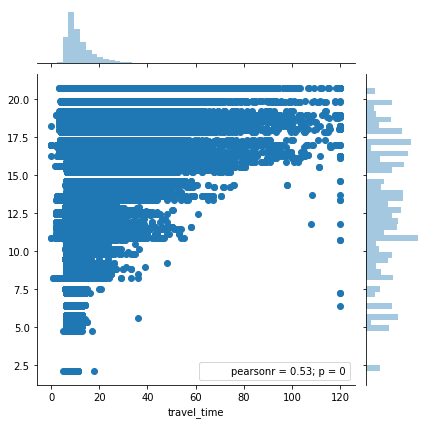

In [11]:
predictions = LinearRegression().fit(X,y).predict(X)
sns.jointplot(x=y, y=predictions)

Model is pretty bad. All predictions are under 20 mins. Does not capture the outliers. The distribution of the predictions is very different to the actual values